# How can we control the increasing number of accidents in New York?

In [1]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
%matplotlib inline

## Introduction

**Business Context.** The city of New York has seen a rise in the number of accidents on the roads in the city. They would like to know if the number of accidents have increased in the last few weeks. For all the reported accidents, they have collected details for each accident and have been maintaining records for the past year and a half (from January 2018 to August 2019). 

The city has contracted you to build visualizations that would help them identify patterns in accidents, which would help them take preventive actions to reduce the number of accidents in the future. They have certain parameters like borough, time of day, reason for accident, etc. Which they care about and which they would like to get specific information on.

**Business Problem.** Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.

**Analytical Context.** You are given a CSV file (stored in the already created ```data``` folder) containing details about each accident like date, time, location of the accident, reason for the accident, types of vehicles involved, injury and death count, etc. The delimiter in the given CSV file is `;` instead of the default `,`. You will be performing the following tasks on the data:

1. Extract additional borough data stored in a JSON file
2. Read, transform, and prepare data for visualization
3. Perform analytics and construct visualizations of the data to identify patterns in the dataset
        
The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these:

1. How have the number of accidents fluctuated over the past year and a half? Have they increased over the time?
2. For any particular day, during which hours are accidents most likely to occur?
3. Are there more accidents on weekdays than weekends?
4. What are the accidents count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?
5. For each borough, during which hours are accidents most likely to occur?
6. What are the top 5 causes of accidents in the city? 
7. What types of vehicles are most involved in accidents per borough?
8. What types of vehicles are most involved in deaths?

## Fetching the relevant data

The client has requested analysis of the accidents-to-area ratio for boroughs. Borough data is stored in a JSON file in the ```data``` folder.

### Question (5 min):

Use the function ```json.load()``` to load the file ```borough_data.json``` as a dictionary.

**Answer**

In [2]:
!pwd

/Users/ggoni/Google Drive/DS4A/W1/extended_case_1_student


In [3]:
json_file_path = "data/borough_data.json"

with open(json_file_path, 'r') as j:
     contents = json.loads(j.read())

In [4]:
contents

{'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37}}

_I am "old school guy", so usually is easier for me to see this a DataFrame_

In [5]:
df_contents=pd.DataFrame(contents)
df_contents

,the bronx,brooklyn,manhattan,queens,staten island
area,42.1,70.82,22.83,108.53,58.37
name,the bronx,brooklyn,manhattan,queens,staten island
population,1.47116e+06,2.64877e+06,1.66473e+06,2.35858e+06,479458


### Question (5 min):

Similarly, use the pandas function ```read_csv()``` to load the file ```accidents.csv``` as a DataFrame. Name this DataFrame ```df```. 

**Answer**

In [6]:
df=pd.read_csv('data/accidents.csv',sep=";")

In [7]:
df.sample(5)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
210255,03/12/2018,17:25,QUEENS,11434.0,40.667522,-73.78063,ROCKAWAY BOULEVARD,0,0,0,...,Unspecified,NaN,NaN,NaN,3862239,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
107847,02/05/2019,8:00,BROOKLYN,11211.0,40.715400,-73.92693,GRAND STREET,0,0,0,...,Unspecified,NaN,NaN,NaN,4075136,Pick-up Truck,NaN,NaN,NaN,NaN
58112,08/01/2018,16:20,QUEENS,11434.0,40.667430,-73.76676,FARMERS BOULEVARD,0,0,0,...,Unspecified,NaN,NaN,NaN,3952830,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
72223,05/19/2019,22:48,BROOKLYN,11206.0,40.702675,-73.93396,FLUSHING AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,4135057,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
178225,05/28/2018,21:29,BRONX,10453.0,40.855920,-73.91720,CEDAR AVENUE,0,0,0,...,Unsafe Lane Changing,NaN,NaN,NaN,3910000,Sedan,Sedan,NaN,NaN,NaN


In [8]:
df.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,238452.000000,231544.000000,231544.000000,238522.000000,238522.000000,238522.000000,238522.000000,238522.000000,238522.000000,2.385220e+05
mean,10865.578838,40.656873,-73.797699,0.054523,0.000532,0.023482,0.000084,0.178076,0.000310,4.008044e+06
std,546.056571,1.632850,2.961521,0.237834,0.023250,0.152835,0.009157,0.587479,0.017848,1.084693e+05
min,10000.000000,0.000000,-74.253930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.511951e+06
25%,10452.000000,40.666750,-73.973860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.913739e+06
50%,11208.000000,40.717007,-73.922770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.006476e+06
75%,11354.000000,40.765715,-73.864890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.102648e+06
max,11697.000000,40.912884,0.000000,6.000000,2.000000,3.000000,1.000000,21.000000,2.000000,4.195347e+06


In [9]:
df.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
ON STREET NAME                    object
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE CODE 1               object
VEHICLE TYPE CODE 2               object
VEHICLE TYPE CODE 3               object
VEHICLE TYPE CODE 4               object
VEHICLE TYPE CODE 5               object
dtype: object

In [10]:
len(df.isna())

238522

_I would like to check how many rows contains na for each column_

In [11]:
df.isna().sum()

DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                             70
LATITUDE                           6978
LONGITUDE                          6978
ON STREET NAME                    84604
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       884
CONTRIBUTING FACTOR VEHICLE 2     40008
CONTRIBUTING FACTOR VEHICLE 3    225450
CONTRIBUTING FACTOR VEHICLE 4    235666
CONTRIBUTING FACTOR VEHICLE 5    237730
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1721
VEHICLE TYPE CODE 2               55590
VEHICLE TYPE CODE 3              226221
VEHICLE TYPE CODE 4              235806
VEHICLE TYPE CODE 5              237769
dtype: int64

_I will also check for unique records_

In [12]:
df.nunique()

DATE                                601
TIME                               1440
BOROUGH                               5
ZIP CODE                            221
LATITUDE                          51566
LONGITUDE                         35126
ON STREET NAME                     5221
NUMBER OF PEDESTRIANS INJURED         7
NUMBER OF PEDESTRIANS KILLED          3
NUMBER OF CYCLIST INJURED             4
NUMBER OF CYCLIST KILLED              2
NUMBER OF MOTORIST INJURED           19
NUMBER OF MOTORIST KILLED             3
CONTRIBUTING FACTOR VEHICLE 1        55
CONTRIBUTING FACTOR VEHICLE 2        54
CONTRIBUTING FACTOR VEHICLE 3        31
CONTRIBUTING FACTOR VEHICLE 4         9
CONTRIBUTING FACTOR VEHICLE 5         6
COLLISION_ID                     238522
VEHICLE TYPE CODE 1                 447
VEHICLE TYPE CODE 2                 459
VEHICLE TYPE CODE 3                  84
VEHICLE TYPE CODE 4                  38
VEHICLE TYPE CODE 5                  21
dtype: int64

**_Key Assumption (all mine) here: each row represent a valid accident, but not all info about them were recorded. Note that each case has a valid date and collision id, but not necessarily each feature imputed._**

## Overview of the data

Let's go through the columns present in the dataframe:

In [13]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

We have the following columns

1. **BOROUGH**: The borough in which the accident occured
2. **COLLISION_ID**: A unique identifier for this collision
3. **CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)**: Reasons for the accident
4. **CROSS STREET NAME**: Nearest cross street to the place of accidents
5. **DATE**: Date of the accident
6. **TIME**: Time of accident
7. **LATITUDE**: Latitude of the accident
8. **LONGITUDE**: Longitude of the accident
9. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED**: Category wise injury
10. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED**: Category wise death
11. **ON STREET NAME**: Street where the accident occured
13. **VEHICLE TYPE CODE (1, 2, 3, 4, 5)**: Types of vehicles involved in the accident
14. **ZIP CODE**: zip code of the accident location

### Exercise 1 (30 min):

Since 2014, New York City has been implementing a road safety plan named [Vision Zero](https://www1.nyc.gov/content/visionzero/pages/). It aims to reduce the number of traffic deaths to *zero* by the end of 2024. The plan is creating new and enhancing current safety measures, some of these include:

- [ ] Automated pedestrian detection
- [ ] Road safety audits at high risk locations
- [ ] Expansion in the cycle track network
- [ ] Targeted education and awareness initiatives
- [ ] Creation of pedestrian refuge islands
- [ ] Launch Integrated Data-Driven Speed Reducer Program (speed humps & speed cushions)

Which of these initiatives could directly benefit from an analysis of the data provided? Check all that apply.

**Note:** You can create check marks by double-clicking this cell and adding an ```[x]``` in the corresponding lines. 

**Answer.**

- [ ] Automated pedestrian detection

The data provided contains the exact location, the number of pedestrians injured/killed, and the contributing factor of the vehicles in each accident. We could study the accidents where pedestrians were injured or killed. This *could* help to place cameras at important spots, where the automatic detection may be needed. However, for the *implementation* of automated pedestrian detection, a data set of images of crosswalks and intersections is more crucial.

- [ ] Road safety audits at high risk locations

As discussed, our data can help with the recognition of problematic spots. We can check the street names where a high number of accidents have occured in the past, then inspect the area to see what extra measures should be implemented. 

- [X] Expansion in the cycle track network

Our data contains the number of cyclists injured/killed. We could determine the spots where these are happening the most and then improve the safety measures around the area. However, we would need more data to determine if these locations have a high volume of cyclists. Thus the data may not be that beneficial for making decisions on expanding the cycle network.

- [x] Targeted education and awareness initiatives

The data provides the contributing factor of the accidents along with the type of vehicles that were involved in them. We can then study which types of vehicles cause the most number of accidents and organize educational initiatives around this.

- [X] Creation of pedestrian refuge islands

Pedestrian islands are usually created on streets that are very wide. Thus, the information provided might not be that beneficial for this initiative, as we do not have information on the width/size of streets.

- [x] Launch Integrated Data-Driven Speed Reducer Program (speed humps & speed cushions)

One of the contributing factors in accidents provided in the data is speeding. We can check if these accidents occur in highly transited areas. Thus, our data might be useful for the implementation of this initiative.

Let's go ahead and answer each of the client's questions.

## Answering the client's questions

### Exercise 2 (30 min):

Group the available data on a monthly basis and generate a line plot of accidents over time. Has the number of accidents increased over the past year and a half?

**Hint**: You may find the pandas functions ```to_datetime()``` and ```dt.to_period()``` useful.

**Answer**

In [14]:
df['DATE_EDIT']=pd.to_datetime(df['DATE'],infer_datetime_format=True)
df['YYYYMM'] = df['DATE_EDIT'].dt.strftime('%Y%m')

In [15]:
df_abm=pd.DataFrame(df.groupby(['YYYYMM'])['COLLISION_ID'].count())
df_abm.reset_index(inplace=True)
df_abm.columns=['YYYYMM','N ACCIDENTS']
df_abm

,YYYYMM,N ACCIDENTS
0,201801,11735
1,201802,10395
2,201803,12519
3,201804,11679
4,201805,13438
5,201806,13314
6,201807,12787
7,201808,12644
8,201809,12425
9,201810,13336


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

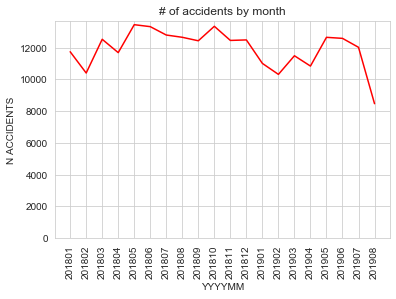

In [16]:
sns.set_style('whitegrid')
g = sns.lineplot(x='YYYYMM',y='N ACCIDENTS',data=df_abm,color='red')
g.set(ylim=(0, None))
g.set_title('# of accidents by month')
plt.xticks(rotation=90)

_We see that the **absolute** number of accidents has not increased over the past year and a half, but have been decreasing, particularly on the last two and a half months._

### Exercise 3 (15 min):

From the plot above, which months seem to have the least number of accidents? What do you think are the reasons behind this?

**Answer** 

In [17]:
df_abm.sort_values(by='N ACCIDENTS',ascending=True)

,YYYYMM,N ACCIDENTS
19,201908,8466
13,201902,10310
1,201802,10395
15,201904,10833
12,201901,11000
14,201903,11482
3,201804,11679
0,201801,11735
18,201907,12014
8,201809,12425


_I would like to check if records relative to August 2019 implies the same days that other months have_

In [18]:
df['DAY_N']=df['DATE_EDIT'].dt.day

In [19]:
df.groupby(['YYYYMM'])['DAY_N'].max()

YYYYMM
201801    31
201802    28
201803    31
201804    30
201805    31
201806    30
201807    31
201808    31
201809    30
201810    31
201811    30
201812    31
201901    31
201902    28
201903    31
201904    30
201905    31
201906    30
201907    31
201908    24
Name: DAY_N, dtype: int64

_Note that August 2019 has only up to 24th imputed, maybe the last full month was not filled with data? Note that winter/fall days seems to be less prone to accidents. A reason could be less vehicle circulation because of the weather. Also, note that number of days in February is smaller, which means a smaller comparation basis_

### Exercise 4 (30 min):

How does the number of accidents vary throughout a single day? Create a new column `HOUR` based on the data from the `TIME` column, then plot a bar graph of the distribution per hour throughout the day.

**Hint:** You may find the function ```dt.hour``` useful. 

**Answer**

In [20]:
df['HOUR'] = pd.to_datetime(df['TIME']).dt.hour

In [21]:
df_abh=pd.DataFrame(df.groupby(['HOUR'])['COLLISION_ID'].count())
df_abh.reset_index(inplace=True)
df_abh.columns=['HOUR','N ACCIDENTS HOUR']
df_abh

,HOUR,N ACCIDENTS HOUR
0,0,8160
1,1,3460
2,2,2570
3,3,2302
4,4,2562
5,5,2878
6,6,4844
7,7,7399
8,8,13403
9,9,12939


Text(0.5, 1.0, '# of accidents by hour')

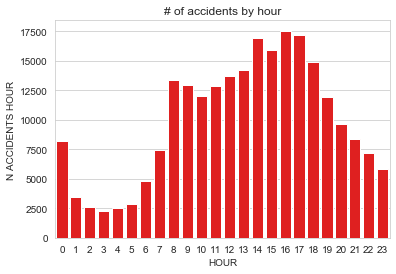

In [22]:
h = sns.barplot(x='HOUR', y='N ACCIDENTS HOUR',data=df_abh,color='red')
h.set(ylim=(0, None))
plt.title('# of accidents by hour')
#plt.xticks(rotation=90)

_On an agreggated basis, accidents tend to peak around 12 am - 6 pm. They start to rise around dawn, which is the time people drive to work, and start falling at 4 pm_

### Exercise 5 (15 min):

In the above question we have aggregated the number accidents per hour disregarding the date and place of ocurrence. Which criticism would you give to this approach?

In [23]:
df_abhb=pd.DataFrame(df.groupby(['HOUR','BOROUGH','YYYYMM'])['COLLISION_ID'].nunique())
df_abhb.reset_index(inplace=True)

_I'll change column names just as a sanity check._

In [24]:
df_abhb.columns=['HOUR','BOROUGH','MONTH','N ACCIDENTS']

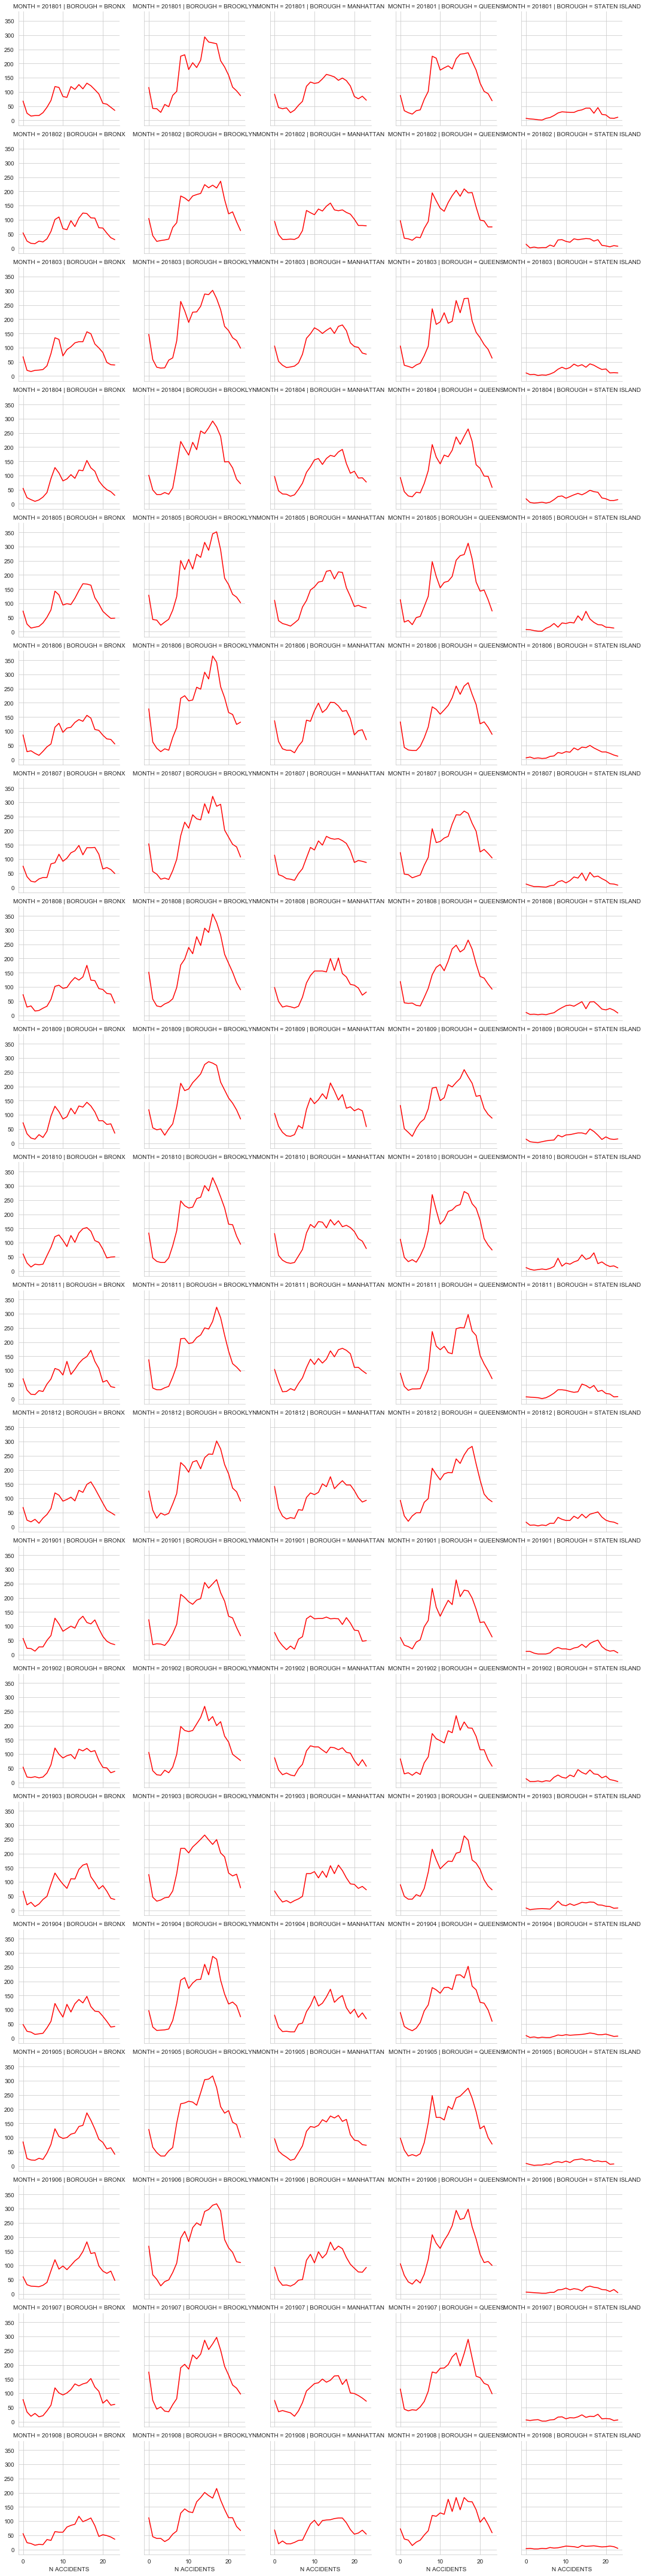

In [25]:
plot_abhb = sns.FacetGrid(df_abhb, col='BOROUGH', row='MONTH')
plot_abhb.map(plt.plot, 'N ACCIDENTS',color='red')

_My criticism is that each Borough has a different behavior along the day. Besides, there is a difference in the curve for each month. It would be also valuable to correlate #of cars in each Borough with total accidents, as a context variable_

**Answer**

### Exercise 6 (15 min):

How does the number of accidents vary throughout a single week? Plot a bar graph based on the accidents count by day of the week.

**Hint:** You may find the function ```dt.weekday``` useful.

**Answer**

In [26]:
df['WEEKDAY'] = df['DATE_EDIT'].dt.weekday

In [27]:
dict_days={0:'1 Mon',1:'2 Tue',2:'3 Wed',3:'4 Thu',4:'5 Fri',5:'6 Sat',6:'7 Sun'}

In [28]:
df['WEEKDAYNAME']=df['WEEKDAY'].map(dict_days)

In [29]:
df.sample(3)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DATE_EDIT,YYYYMM,DAY_N,HOUR,WEEKDAY,WEEKDAYNAME
156705,10/03/2018,12:55,MANHATTAN,10032.0,40.841717,-73.94435,NaN,0,0,0,...,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-10-03,201810,3,12,2,3 Wed
101625,01/31/2019,8:57,BRONX,10469.0,40.875393,-73.83862,NaN,0,0,0,...,Sedan,NaN,NaN,NaN,2019-01-31,201901,31,8,3,4 Thu
78424,05/14/2019,10:58,BROOKLYN,11226.0,40.646687,-73.95413,LOTT STREET,0,0,0,...,NaN,NaN,NaN,NaN,2019-05-14,201905,14,10,1,2 Tue


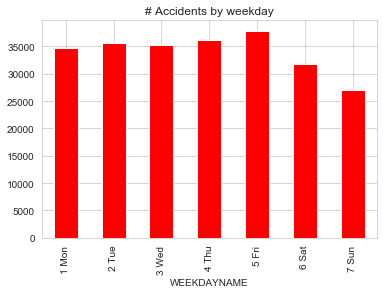

In [30]:
df.groupby(['WEEKDAYNAME'])['COLLISION_ID'].count().plot(kind='bar',color='red',title='# Accidents by weekday')

_As we would expect, accident are less likely to happen during weekends. Maybe on Fridays people tend to rush to be home?_

### Exercise 7 (30 min):

Plot a bar graph of the total number of accidents in each borough, as well as one of the accidents per square mile per borough. What can you conclude?

**Hint:** You may want to update some of the keys in the borough dictionary to match the names in the dataframe. 

**Answer**

**_Assumption: The total number of accidents is requested for the entire period._**

_Otherwise, we should also group by YYYYMM._

In [31]:
df_apb=pd.DataFrame(df.groupby(['BOROUGH'])['COLLISION_ID'].nunique()).reset_index()
df_apb.columns=['BOROUGH','TOTAL N ACCIDENTS']

_The total number of accidents by Borough is:_

In [32]:
df_apb

,BOROUGH,TOTAL N ACCIDENTS
0,BRONX,37709
1,BROOKLYN,76253
2,MANHATTAN,48749
3,QUEENS,67120
4,STATEN ISLAND,8691


In [33]:
df_apb['TOTAL N ACCIDENTS'].sum()-df.COLLISION_ID.nunique()

0

In [34]:
df_boroughs=pd.DataFrame.from_dict(contents).transpose()

In [35]:
df_boroughs.index=df_boroughs.index.str.upper()

In [36]:
df_boroughs.index=df_boroughs.index.str.replace('THE ','')

In [37]:
df_boroughs['BOROUGH']=df_boroughs.index
df_boroughs

,area,name,population,BOROUGH
BRONX,42.1,the bronx,1.47116e+06,BRONX
BROOKLYN,70.82,brooklyn,2.64877e+06,BROOKLYN
MANHATTAN,22.83,manhattan,1.66473e+06,MANHATTAN
QUEENS,108.53,queens,2.35858e+06,QUEENS
STATEN ISLAND,58.37,staten island,479458,STATEN ISLAND


_Must map each Borough Area (from the json dictionary) into my table_

In [38]:
df_apb=df_apb.merge(df_boroughs,on='BOROUGH',how='left')

In [39]:
df_apb

,BOROUGH,TOTAL N ACCIDENTS,area,name,population
0,BRONX,37709,42.1,the bronx,1.47116e+06
1,BROOKLYN,76253,70.82,brooklyn,2.64877e+06
2,MANHATTAN,48749,22.83,manhattan,1.66473e+06
3,QUEENS,67120,108.53,queens,2.35858e+06
4,STATEN ISLAND,8691,58.37,staten island,479458


In [40]:
df_apb['ABA']=df_apb['TOTAL N ACCIDENTS']/df_apb['area']

Text(0.5, 1.0, '# of accidents by Borough')

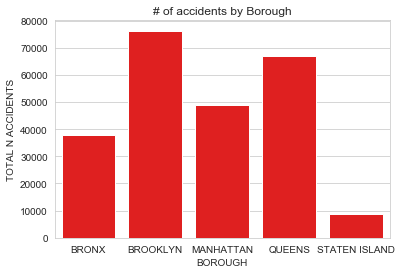

In [41]:
apb = sns.barplot(x='BOROUGH', y='TOTAL N ACCIDENTS',data=df_apb,color='red')
apb.set(ylim=(0, None))
apb.set_title('# of accidents by Borough')
#plt.xticks(rotation=90)

Text(0.5, 1.0, '# of accidents by AREA & Borough ')

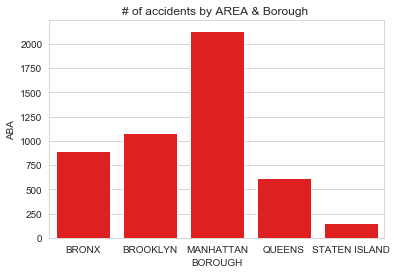

In [42]:
apba = sns.barplot(x='BOROUGH',y='ABA',data=df_apb,color='red')
apba.set(ylim=(0, None))
apba.set_title('# of accidents by AREA & Borough ')
#plt.xticks(rotation=90)

_Except for Manhattan, using unit Surface size doesn´t seem to have an effect on the indicator when using it comparatively  (now relative to area)_

### Exercise 8 (30 min):

Which hours have the most accidents for each borough? Plot a bar graph for each borough showing the number of accidents for each hour of the day.

**Hint:** You can use ```sns.FacetGrid``` to create a grid of plots with the hourly data of each borough. 

**Answer**

In [43]:
df_cbbh=pd.DataFrame(df.groupby(['BOROUGH','HOUR'])['COLLISION_ID'].nunique()).reset_index()
df_cbbh.head(10)

,BOROUGH,HOUR,COLLISION_ID
0,BRONX,0,1329
1,BRONX,1,529
2,BRONX,2,402
3,BRONX,3,361
4,BRONX,4,418
5,BRONX,5,508
6,BRONX,6,835
7,BRONX,7,1406
8,BRONX,8,2341
9,BRONX,9,2162


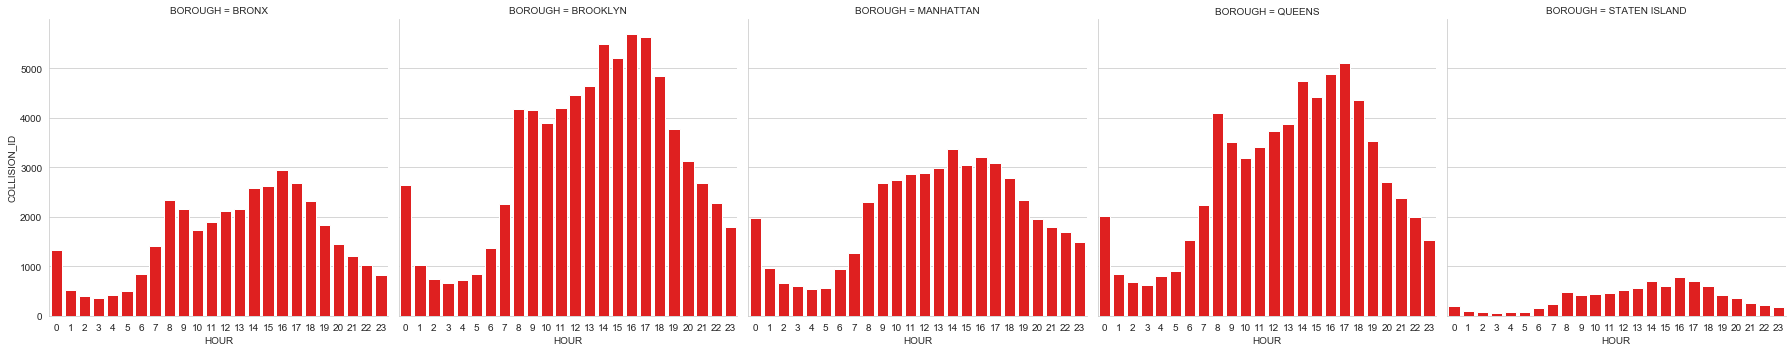

In [44]:
plot_cbbh = sns.catplot(x="HOUR", y="COLLISION_ID", col="BOROUGH",data=df_cbbh, kind="bar",color='red')

_Most accidents occur between 1 PM and 5 PM, and there is a notorious difference for each Borough_

### Exercise 9 (45 min):

What factors cause the most accidents? Avoid double counting the contributing factors of a single accident. 

**Hint:** One way of dealing with repetitions is to concatenate the corresponding columns while preserving their indexes, you can do that with the functions ```pd.concat()``` and  ```reset_index()```. Then, use an appropiate ```group_by``` to count the number of repetitions of contributed factors per accident.   

**Answer**

In [45]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'DATE_EDIT', 'YYYYMM', 'DAY_N', 'HOUR', 'WEEKDAY', 'WEEKDAYNAME'],
      dtype='object')

_Each Contributing Factor must be counted ONCE in a COLLISION_ID_

In [46]:
lista_contr=[x for x in df.columns if "CONTR" in x]
df_contr=pd.concat([df[lista_contr],df['COLLISION_ID']],axis=1)

In [47]:
df_contr.sample(5)

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID
1286,Passing Too Closely,Backing Unsafely,NaN,NaN,NaN,4188561
106751,Pavement Slippery,Pavement Slippery,NaN,NaN,NaN,4083845
104196,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4085865
20812,Unspecified,Unspecified,NaN,NaN,NaN,4158282
27568,Unspecified,Unspecified,NaN,NaN,NaN,4152577


_Beware of double counting! Each kind of vehicle must be counted **ONCE** per accident_

In [48]:
df_contr_edit=df_contr.melt(id_vars=['COLLISION_ID'])

In [49]:
df_contr_edit.sample(10)

,COLLISION_ID,variable,value
1164128,3859176,CONTRIBUTING FACTOR VEHICLE 5,NaN
900755,3909708,CONTRIBUTING FACTOR VEHICLE 4,NaN
568942,4114624,CONTRIBUTING FACTOR VEHICLE 3,NaN
974155,4161353,CONTRIBUTING FACTOR VEHICLE 5,NaN
97531,4075945,CONTRIBUTING FACTOR VEHICLE 1,Driver Inattention/Distraction
142956,4032957,CONTRIBUTING FACTOR VEHICLE 1,Unspecified
444528,3868169,CONTRIBUTING FACTOR VEHICLE 2,Unspecified
1186277,3833598,CONTRIBUTING FACTOR VEHICLE 5,NaN
650701,3920976,CONTRIBUTING FACTOR VEHICLE 3,NaN
311107,4133253,CONTRIBUTING FACTOR VEHICLE 2,Unspecified


In [50]:
df_contr_edit.groupby(['value'])['COLLISION_ID'].nunique().sort_values(ascending=False)

value
Unspecified                                              190096
Driver Inattention/Distraction                            61752
Failure to Yield Right-of-Way                             19641
Following Too Closely                                     17293
Backing Unsafely                                          14835
Passing Too Closely                                       12631
Passing or Lane Usage Improper                            11808
Other Vehicular                                            8860
Unsafe Lane Changing                                       6643
Turning Improperly                                         6626
Traffic Control Disregarded                                4687
Driver Inexperience                                        4152
Unsafe Speed                                               3469
Reaction to Uninvolved Vehicle                             3034
Alcohol Involvement                                        2491
View Obstructed/Limited           

_Most important factor are Driver Inattention/Distraction, follwed by Failure to Yield and Not keeping a prudential distance_

### Exercise 10 (45 min):

Which vehicle types are most involved in accidents per borough? Avoid double counting the type of vehicles present in a single accident. 

**Hint:** You can apply a similar approach to the one used in the previous question.

**Answer** 

In [51]:
lista_vt=[x for x in df.columns if "VEHICLE TYPE" in x]
df_vt=pd.concat([df[lista_vt],df['COLLISION_ID']],axis=1)

In [52]:
df_vt.sample(10)

,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,COLLISION_ID
90640,Sedan,Box Truck,NaN,NaN,NaN,4110970
216725,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,3845147
2116,Pick-up Truck,Taxi,NaN,NaN,NaN,4178518
32649,Taxi,Sedan,NaN,NaN,NaN,3978111
217882,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,3845601
218153,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,3851614
127366,Sedan,NaN,NaN,NaN,NaN,4047630
18073,Sedan,Box Truck,NaN,NaN,NaN,4162269
157098,Taxi,Bike,NaN,NaN,NaN,4004297
212027,PASSENGER VEHICLE,BU,NaN,NaN,NaN,3843322


In [53]:
df_vt_edit=df_vt.melt(id_vars=['COLLISION_ID'])

In [54]:
df_vt_edit=df_vt_edit[~df_vt_edit['value'].isna()]

In [55]:
df_vt_edit.sample(10)

,COLLISION_ID,variable,value
386794,4008584,VEHICLE TYPE CODE 2,Station Wagon/Sport Utility Vehicle
302649,4129376,VEHICLE TYPE CODE 2,Sedan
320027,4115510,VEHICLE TYPE CODE 2,Station Wagon/Sport Utility Vehicle
63394,4119596,VEHICLE TYPE CODE 1,Station Wagon/Sport Utility Vehicle
410359,3951332,VEHICLE TYPE CODE 2,Sedan
444104,3876325,VEHICLE TYPE CODE 2,SPORT UTILITY / STATION WAGON
454540,3855972,VEHICLE TYPE CODE 2,SPORT UTILITY / STATION WAGON
97619,4082429,VEHICLE TYPE CODE 1,Pick-up Truck
405026,3926688,VEHICLE TYPE CODE 2,Sedan
51098,3948910,VEHICLE TYPE CODE 1,Station Wagon/Sport Utility Vehicle


_I don't like Lower and Upper types mixed, so I'll use Proper_

In [56]:
df_vt_edit['value']=df_vt_edit['value'].str.title()

In [57]:
df_vt_edit['value'].value_counts().sort_values(ascending=False)

Sedan                                  155883
Station Wagon/Sport Utility Vehicle    124663
Passenger Vehicle                       40623
Sport Utility / Station Wagon           31219
Taxi                                    21684
Pick-Up Truck                           14210
Box Truck                                8786
Bike                                     6343
Bus                                      6030
Van                                      2819
Tractor Truck Diesel                     2402
Motorcycle                               2141
Tk                                       2124
Bu                                       1774
Dump                                     1145
Bicycle                                  1018
Convertible                              1005
Ambulance                                 822
Pk                                        720
Garbage Or Refuse                         695
Flat Bed                                  688
Vn                                

_I would prefer to normalize a few names:_

In [58]:
df_vt_edit.loc[df_vt_edit['value']=='Sport Utility / Station Wagon','value']='Station Wagon/Sport Utility Vehicle'
df_vt_edit.loc[df_vt_edit['value']=='Bicycle','value']='Bike'
df_vt_edit.loc[df_vt_edit['value']=='Motorbike','value']='Motorcycle'

_I'm tempted to put "Passenger Vehicle" in the same category that "Taxi", but I think that the information seems ambiguous: left untouched_

In [59]:
df_vt_edit.groupby(['value'])['COLLISION_ID'].nunique().sort_values(ascending=False).nlargest(20)

value
Station Wagon/Sport Utility Vehicle    124205
Sedan                                  119714
Passenger Vehicle                       31228
Taxi                                    19082
Pick-Up Truck                           13638
Box Truck                                8509
Bike                                     7270
Bus                                      5870
Van                                      2730
Tractor Truck Diesel                     2317
Motorcycle                               2229
Tk                                       2051
Bu                                       1720
Dump                                     1140
Convertible                               987
Ambulance                                 798
Pk                                        712
Garbage Or Refuse                         693
Flat Bed                                  684
Vn                                        594
Name: COLLISION_ID, dtype: int64

_The most involved vehicle types are Station Wagons ans Sedans_ 

### Exercise 11 (15 min):

In a 2018 [interview](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) with The New York Times, New York's mayor de Blasio stated that *'Vision Zero is clearly working'*. That year, the number of deaths in traffic accidents in NYC dropped to a historical 202. Yet, as reported by [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio-1-30707464/), the number of fatalities has increased by 30% in the first quarter of 2019 compared to the previous year and the number of pedestrians and cyclist injured has not seen any improvement.

How would you use the provided data to understand what went wrong in the first quarter of 2019?

> - [ ] Consider the accidents of the first quarter of 2019. Then, check for the most common causes of accidents where pedestrians and cyclists were involved. Give a recommendation based solely on this information. 

> - [ ] Create a pair of heatmaps of the accidents involving injured/killed pedestrians and cyclists in the first quarter of 2018 and 2019. Compare these two to see if there is any change in the concentration of accidents. In critical areas, study the type of factors involved in the accidents. Give a recommendation to visit these areas to study the problem further.    

> - [ ] The provided data is insufficient to improve our understanding of the situation.

> - [X] None of the above. I would do the following: *First of all, or at least before heatmaps and causes, I would start by checking the claim of +30% mortality : I don't get that number neither by mortality rate nor by number of accidents*.

**Answer**

In [60]:
df_18q1=df[(df.DATE_EDIT>='2018-01-01')&(df.DATE_EDIT<'2018-04-01')]

In [61]:
df_19q1=df[(df.DATE_EDIT>='2019-01-01')&(df.DATE_EDIT<'2019-04-01')]

In [62]:
lista_killed=[x for x in df.columns if "KILLED" in x]

In [63]:
lista_killed

['NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST KILLED']

In [64]:
df_18q1=pd.concat([df_18q1[lista_killed],df_18q1['COLLISION_ID']],axis=1)
df_19q1=pd.concat([df_19q1[lista_killed],df_19q1['COLLISION_ID']],axis=1)

Change between # accidents between 1Q 2019 and 1Q 2018:

In [65]:
df_19q1['COLLISION_ID'].nunique()/df_18q1['COLLISION_ID'].nunique()-1

-0.05359462033536322

To estimate Change between total deaths/total accidents between 1Q 2019 and 1Q 2018:

In [66]:
df_18q1['TK']=df_18q1[lista_killed].sum(axis=1)
df_19q1['TK']=df_19q1[lista_killed].sum(axis=1)

In [67]:
r19q1=df_19q1['TK'].sum()/df_19q1['COLLISION_ID'].nunique()

In [68]:
r18q1=df_18q1['TK'].sum()/df_18q1['COLLISION_ID'].nunique()

In [69]:
print("Mortality rate rise: {:.1f}%".format(100*(r19q1/r18q1-1))) 

Mortality rate rise: 23.9%


In [70]:
print("Percentage of total deaths rise: {:.1f}%".format(100*(df_19q1['TK'].sum()/df_18q1['TK'].sum()-1)))

Percentage of total deaths rise: 17.2%


### Exercise 12 (45 min):

Calculate the number of deaths caused by each type of vehicle. Plot a bar chart for the top 5 vehicles. Which vehicles are most often involved in deaths, and by how much more than the others?

**For example,** if two people died at an accident where 5 vehicles were involved: 4 are PASSENGER VEHICLE and 1 is a SPORT UTILITY/STATION WAGON. Then, we would add two deaths to each PASSENGER VEHICLE and SPORT UTILITY/STATION WAGON types.

**Hint:** You may want to create a new column with the total number of kills in the accident. For that you may find the function ```.to_numpy()``` useful. Then, proceed as the previous excercises to avoid double-counting the type of vehicles. 

**Answer**

In [71]:
lista_killed=[x for x in df.columns if "KILLED" in x]

In [72]:
df_dav=pd.concat([df[lista_vt],df[lista_killed],df['COLLISION_ID']],axis=1)

In [73]:
df_dav.sample(10)

,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST KILLED,COLLISION_ID
226487,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,0,0,0,3837776
228867,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,0,0,0,3827548
64835,Pick-up Truck,Sedan,NaN,NaN,NaN,0,0,0,4120999
225167,BU,PASSENGER VEHICLE,NaN,NaN,NaN,0,0,0,3840100
58712,Sedan,NaN,NaN,NaN,NaN,0,0,0,3957208
50479,Pick-up Truck,Sedan,NaN,NaN,NaN,0,0,0,3960422
193016,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,0,0,0,3906450
222196,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,0,0,0,3857671
213943,SPORT UTILITY / STATION WAGON,BICYCLE,PASSENGER VEHICLE,NaN,NaN,0,0,0,3863467
189674,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,0,0,0,3911459


In [74]:
df_dav['TK']=df_dav[lista_killed].sum(axis=1)
df_dav=df_dav[df_dav.TK!=0]

In [75]:
df_dav.sample(10)

,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST KILLED,COLLISION_ID,TK
116025,Bus,NaN,NaN,NaN,NaN,1,0,0,4049397,1
103326,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,1,0,0,4083761,1
22453,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,1,0,0,4153288,1
89466,Sedan,Bike,NaN,NaN,NaN,0,1,0,4096754,1
195710,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,0,0,1,3886943,1
170544,Sedan,NaN,NaN,NaN,NaN,1,0,0,3929463,1
41390,NaN,NaN,NaN,NaN,NaN,1,0,0,3987339,1
97826,Sedan,NaN,NaN,NaN,NaN,0,0,1,4082805,1
133011,Sedan,NaN,NaN,NaN,NaN,1,0,0,4019525,1
220436,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,1,0,0,3846034,1


In [76]:
df_dav.drop(columns=lista_killed,inplace=True)

In [77]:
df_dav.sample(10)

,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,COLLISION_ID,TK
143672,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,4034662,1
237780,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,3832804,1
144915,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,4016011,1
173543,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,3919314,1
114490,Dump,NaN,NaN,NaN,NaN,4056490,1
18599,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,4148772,1
183187,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,3912745,1
134002,Sedan,NaN,NaN,NaN,NaN,4036267,1
172118,Sedan,NaN,NaN,NaN,NaN,3932622,1
133584,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,4016675,1


In [78]:
df_dav_edit=df_dav.melt(id_vars=['COLLISION_ID','TK'])

In [79]:
df_dav_edit.sample(10)

,COLLISION_ID,TK,variable,value
328,4060483,1,VEHICLE TYPE CODE 2,Station Wagon/Sport Utility Vehicle
1074,3845944,1,VEHICLE TYPE CODE 5,NaN
131,4016335,1,VEHICLE TYPE CODE 1,Station Wagon/Sport Utility Vehicle
962,4068862,1,VEHICLE TYPE CODE 5,NaN
132,4013263,1,VEHICLE TYPE CODE 1,Pick-up Truck
903,4166853,1,VEHICLE TYPE CODE 5,NaN
544,4066754,1,VEHICLE TYPE CODE 3,NaN
449,4183333,1,VEHICLE TYPE CODE 3,NaN
555,4055926,1,VEHICLE TYPE CODE 3,NaN
991,4056090,1,VEHICLE TYPE CODE 5,Sedan


In [80]:
df_dav.TK.sum()

221

In [81]:
df_dav_edit['value']=df_dav_edit['value'].str.title()

In [82]:
df_dav_edit.dropna(subset=['value'],inplace=True)

In [83]:
df_dav_edit=df_dav_edit.sort_values(by='TK',ascending=False)

In [84]:
df_dav_edit.TK.sum()

357

In [85]:
df_dav_edit.groupby(['value'])['TK'].sum().sort_values(ascending=False)

value
Station Wagon/Sport Utility Vehicle    100
Sedan                                   79
Passenger Vehicle                       33
Sport Utility / Station Wagon           26
Motorcycle                              23
Bike                                    19
Pick-Up Truck                           12
Bus                                     10
Box Truck                                8
Taxi                                     6
Tractor Truck Diesel                     4
Van                                      3
Dump                                     3
Bicycle                                  3
Tanker                                   3
Concrete Mixer                           2
Garbage Or Refuse                        2
Bu                                       2
Tk                                       2
Tow Truck / Wrecker                      2
E Sco                                    1
Convertible                              1
Beverage Truck                           1
Vn   

_I would prefer to normalize names:_

In [86]:
df_dav_edit.loc[df_dav_edit['value']=='Sport Utility / Station Wagon','value']='Station Wagon/Sport Utility Vehicle'
df_dav_edit.loc[df_dav_edit['value']=='Bicycle','value']='Bike'
df_dav_edit.loc[df_dav_edit['value']=='Motorbike','value']='Motorcycle'

In [87]:
df_dav_edit.groupby(['value'])['TK'].sum().sort_values(ascending=False)

value
Station Wagon/Sport Utility Vehicle    126
Sedan                                   79
Passenger Vehicle                       33
Motorcycle                              24
Bike                                    22
Pick-Up Truck                           12
Bus                                     10
Box Truck                                8
Taxi                                     6
Tractor Truck Diesel                     4
Dump                                     3
Tanker                                   3
Van                                      3
Bu                                       2
Concrete Mixer                           2
Garbage Or Refuse                        2
Tk                                       2
Tow Truck / Wrecker                      2
E Sco                                    1
Convertible                              1
Beverage Truck                           1
Vn                                       1
Motorscooter                             1
Md   

Text(0, 0.5, '')

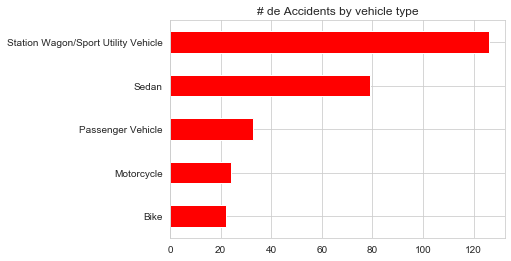

In [88]:
df_dav_edit.groupby(['value'])['TK'].sum().sort_values(ascending=False).nlargest(5). \
    plot(kind='barh',title='# de Accidents by vehicle type',color='red').invert_yaxis()
plt.ylabel('')